In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv(r'D:\codeplayground\New folder (2)\smsspam\spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
df = df.rename(columns={'v1':'label' , 'v2':'Message'})

In [7]:
df

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
uniqueValues = df['label'].value_counts()

In [11]:
list(uniqueValues)

[4825, 747]

In [12]:
labels = list(uniqueValues.keys())
values = list(uniqueValues)

<BarContainer object of 2 artists>

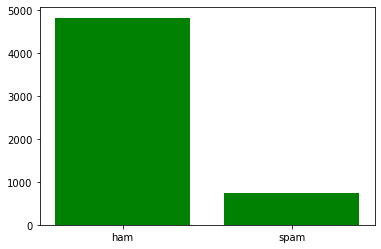

In [13]:
plt.bar(labels,values,color='green')

In [14]:
df.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['label'] = encoder.fit_transform(df['label'])

In [17]:
df.head()

,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum()

label      0
Message    0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep='first')

,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int32 
 1   Message  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [22]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# EDA

In [23]:
df.head()

,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


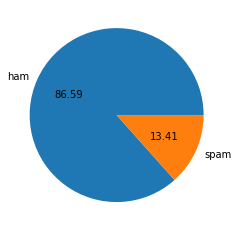

In [24]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
df['number_characters'] = df['Message'].apply(len)

In [26]:
df.head()

,label,Message,number_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message, Length: 5572, dtype: int64

In [28]:
df['number_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,label,Message,number_characters,number_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['number_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,label,Message,number_characters,number_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:>

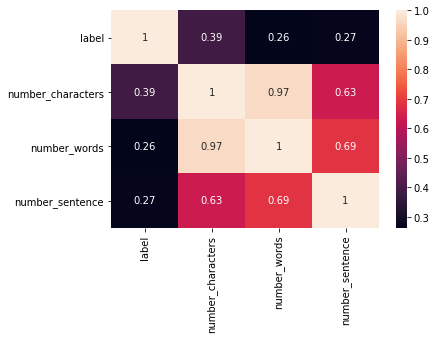

In [32]:
sns.heatmap(df.corr(),annot=True)

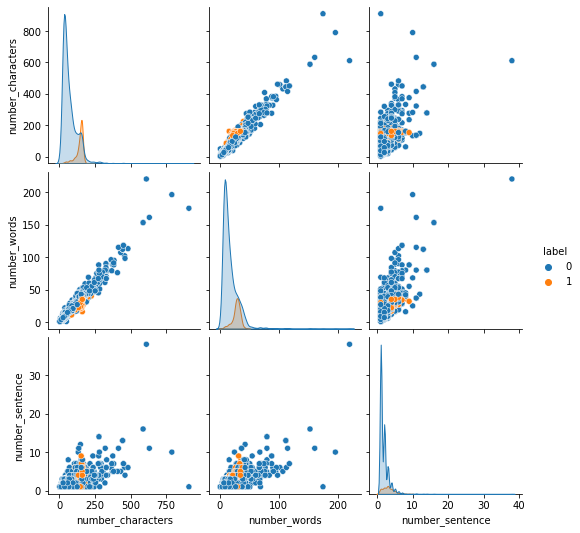

In [33]:
sns.pairplot(df,hue='label')

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [37]:
df.head()

,label,Message,number_characters,number_words,number_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
y = df['label']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [46]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [47]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [50]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [51]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision,y_pred

In [52]:
accuracy_scores = []
precision_scores = []
difference = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,predval = train_classifier(clf, X_train,y_train,X_test,y_test)
    mlm =list(predval)
    mlm = pd.DataFrame(mlm)  
    mlm = list(mlm.value_counts())
    mln = list(y_test.value_counts())
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('Difference -',mln[1]-mlm[1])
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    difference.append(mln[1]-mlm[1])

For  SVC
Accuracy -  0.9713004484304932
Precision -  0.9846153846153847
Difference - 28
For  KN
Accuracy -  0.9040358744394619
Precision -  1.0
Difference - 107
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
Difference - 37
For  DT
Accuracy -  0.9255605381165919
Precision -  0.8865979381443299
Difference - 61
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
Difference - 46
For  RF
Accuracy -  0.9650224215246637
Precision -  0.983739837398374
Difference - 35
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
Difference - 35
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9166666666666666
Difference - 26
For  ETC
Accuracy -  0.9704035874439462
Precision -  0.9844961240310077
Difference - 29
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
Difference - 57
For  xgb
Accuracy -  0.9614349775784753
Precision -  0.9831932773109243
Difference - 39


In [53]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Difference':difference})

In [54]:
performance_df

,Algorithm,Accuracy,Precision,Difference
0,SVC,0.971300,0.984615,28
1,KN,0.904036,1.000000,107
2,NB,0.965022,0.991736,37
3,DT,0.925561,0.886598,61
4,LR,0.951570,0.964286,46
5,RF,0.965022,0.983740,35
6,AdaBoost,0.959641,0.959350,35
7,BgC,0.956951,0.916667,26
8,ETC,0.970404,0.984496,29
9,GBDT,0.936323,0.930693,57


In [55]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [56]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.971300
1,KN,Accuracy,0.904036
2,NB,Accuracy,0.965022
3,DT,Accuracy,0.925561
4,LR,Accuracy,0.951570
5,RF,Accuracy,0.965022
6,AdaBoost,Accuracy,0.959641
7,BgC,Accuracy,0.956951
8,ETC,Accuracy,0.970404
9,GBDT,Accuracy,0.936323


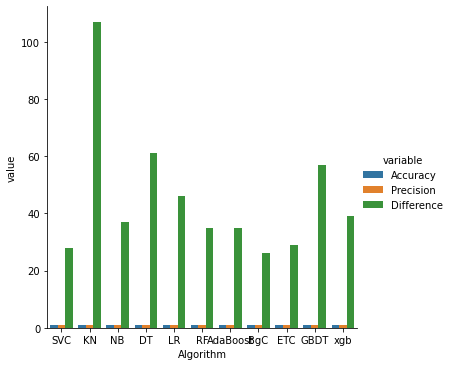

In [57]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)

In [60]:
model = bc

In [61]:
model.fit(X_train,y_train)

BaggingClassifier(n_estimators=50, random_state=2)

In [62]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
response = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [64]:
response

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [74]:
import pickle
pickle.dump(tfidf,open(r'D:\codeplayground\New folder (2)\smsspam\vectorizer.pkl','wb'))
pickle.dump(model,open(r'D:\codeplayground\New folder (2)\smsspam\model.pkl','wb'))

In [75]:
tfidf = pickle.load(open(r'D:\codeplayground\New folder (2)\smsspam\vectorizer.pkl','rb'))
model = pickle.load(open(r'D:\codeplayground\New folder (2)\smsspam\model.pkl','rb'))

In [76]:
transformed_sms = transform_text("SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info")
# 2. vectorize
vector_input = tfidf.transform([transformed_sms]).toarray()
# 3. predict
result = model.predict(vector_input)

In [77]:
result

array([1])

In [79]:
message = input('Plese enter your message:')
transformed_sms = transform_text(message)
vector_input = tfidf.transform([transformed_sms]).toarray()
# 3. predict
result = model.predict(vector_input)[0]
print('************************')
if result == 0:
    print('The message is a ham')
else:
    print('The the message is spam')
print('************************')

Plese enter your message:FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
************************
The the message is spam
************************
